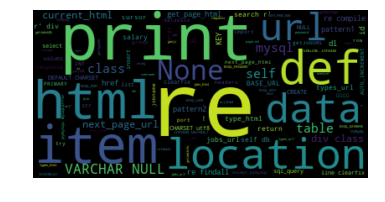

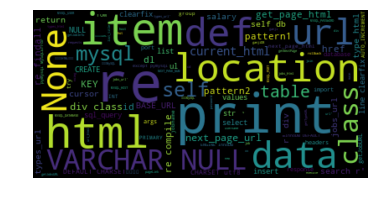

In [17]:

from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt


d = path.dirname('__file__')

# 读取整个文本
text = open(path.join(d, 'spider.txt'), encoding='UTF-8').read()

# 生成一个词云图像
wordcloud = WordCloud().generate(text)

# matplotlib展示词云图像
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# max_font_size 设置词云中文字的最大大小
# width, height, margin 设置属性
# generate 可以对文本自动分词，对中文支持不好
wordcloud = WordCloud(max_font_size=66).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('./myWordColu.png')
plt.show()


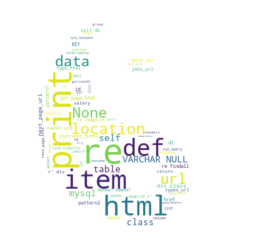

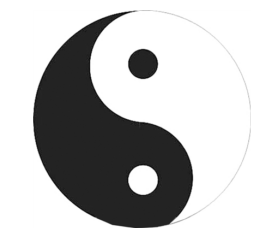

In [72]:
from os import path
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

"""使用蒙版图像"""
# 读取当前路径
d = path.dirname('__file__')

# 读取文件
text = open(path.join(d, 'spider.txt'), encoding='UTF-8').read()

# 读取图片
girl2_mask = np.array(Image.open(path.join('figure/yinyang.jpg')))

stopwords = set(STOPWORDS)
stopwords.add("said")
# 设置词云属性
wc = WordCloud(background_color="white", max_words=2000, mask=girl2_mask,
              stopwords=stopwords)
# 生成词云
wc.generate(text)

# 保存
wc.to_file(path.join(d, "./yinyang.png"))

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.figure()
plt.imshow(girl2_mask, cmap=plt.cm.gray, interpolation="bilinear")
plt.axis("off")
plt.show()

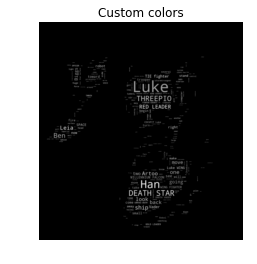

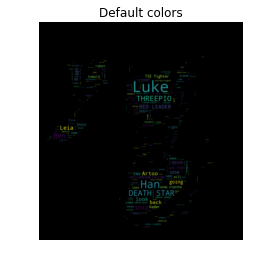

In [80]:
from os import path
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import random

"""着色"""

def grey_color_func(word, font_size, position, orientation, random_state=None,
                   **kwargs):
    return "hsl(0,0%%,%d%%)" % random.randint(60, 100)

d = path.dirname('__file__')

# 读取图片
mask = np.array(Image.open(path.join('./figure/shoes.jpg')))

# 文字
text = open(path.join('./words.txt'), encoding='UTF-8').read()

# 预处理
text = text.replace("HAN", "Han").replace("LUKE'S", "Luke")

# 添加电影剧本特定的停用词
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")

wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords, margin=10,
              random_state=1).generate(text)

# 存储默认的彩色图像
default_colors = wc.to_array()
plt.title("Custom colors")
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
          interpolation="bilinear")
wc.to_file("a_new_hope.png")
plt.axis("off")
plt.figure()
plt.title("Default colors")
plt.imshow(default_colors, interpolation="bilinear")
plt.axis("off")
plt.show()

<Figure size 432x288 with 0 Axes>

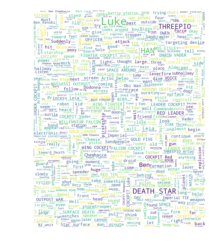

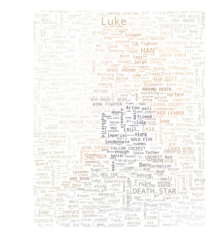

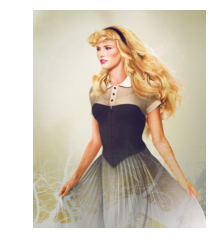

<Figure size 432x288 with 0 Axes>

In [89]:
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import random

"""
您可以在ImageColorGenerator中实现使用基于图像的着色策略对
文字云进行着色，它使用由源图像中的单词占用的区域的平均颜色。
"""

# 读取文字
text = open('words.txt', encoding='UTF-8').read()

# 读取蒙版/彩色图形
coloring = np.array(Image.open('./figure/girl10.jpg'))
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")

wc = WordCloud(background_color="white", max_words=1000, mask=coloring,
              stopwords=stopwords, max_font_size=40, random_state=42).generate(text)

# 从图形创建着色
image_colors = ImageColorGenerator(coloring)

# 显示
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.figure()

# 重新着色
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.figure()

plt.imshow(coloring, cmap=plt.cm.gray, interpolation="bilinear")
plt.axis("off")
plt.figure()


In [92]:
"""
表情实例
===============
一个简单的例子，显示如何包含表情符号。 请注意，这个例子似乎不适用于OS X（苹果系统），但是确实如此
在Ubuntu中正常工作
包含表情符号有3个重要步骤：
1) 使用io.open而不是内置的open来读取文本输入。 这确保它被加载为UTF-8
2) 重写词云使用的正则表达式以将文本解析为单词。 默认表达式只会匹配ascii的单词
3) 将默认字体覆盖为支持表情符号的东西。 包含的Symbola字体包括黑色和白色大多数表情符号的白色轮廓。 目前PIL / Pillow库存在的问题似乎可以预防
它在OS X上运行正常（https://github.com/python-pillow/Pillow/issues/1774）。
如果你有问题，试试在Ubuntu上运行
"""
import io
import string
from os import path
from wordcloud import WordCloud

d = path.dirname('__file__')

#使用io.open将文件正确加载为UTF-8非常重要
text = open(path.join('words.txt'), encoding='UTF-8').read()

# the regex used to detect words is a combination of normal words, ascii art, and emojis
# 2+ consecutive letters (also include apostrophes), e.x It's
normal_word = r"(?:\w[\w']+)"
# 2+ consecutive punctuations, e.x. :)
ascii_art = r"(?:[{punctuation}][{punctuation}]+)".format(punctuation=string.punctuation)
# a single character that is not alpha_numeric or other ascii printable
emoji = r"(?:[^\s])(?<![\w{ascii_printable}])".format(ascii_printable=string.printable)
regexp = r"{normal_word}|{ascii_art}|{emoji}".format(normal_word=normal_word, ascii_art=ascii_art,
                                                     emoji=emoji)

# 生成一个词云图片
# Symbola字体包含大多数表情符号
font_path = path.join(d, 'fonts', 'Symbola', 'Symbola.ttf')
wordcloud = WordCloud(font_path=font_path, regexp=regexp).generate(text)

# 采用matplotlib方式：展示生成的图片
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

OSError: cannot open resource